<a href="https://www.kaggle.com/code/aisuko/gaussian-error-linear-unit-gelu?scriptVersionId=164534919" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

GELU stands for Gaussian Error Linear Unit. It's an activation function used in neural networks. The GELU function can be represented mathematically as:

```math
GELU(x)=0.5*x*(1+tanh(sqrt(2/pi)*(x+0.044715*x^3)))
```


The GELU activation function is used to introduce non-linearity in the output of a neuron. For exmaple, here we are going to implement an Encoder model with two layer of GELU:

```rust
#[derive(Module, Debug)]
pub struct AudioEncoder<B: Backend> {
    conv1: Conv1d<B>,
    gelu1: nn::GELU,
    conv2: Conv1d<B>,
    gelu2: nn::GELU,
    blocks: Vec<ResidualEncoderAttentionBlock<B>>,
    ln_post: nn::LayerNorm<B>,
    positional_embedding: Param<Tensor<B, 2>>,
    n_mels: usize,
    n_audio_ctx: usize,
}
```

# Benefit of using GELU

What is the benefit of using GELU activation function over other activation functions?

The GELU activation function has been found to perform better than other activation functions in some tasks, especially in transformer models. Here are some benefits of using GELU:


## Non Linearity

Like other activation functions, GELU introduces non-linearity into the model, which allows the model to learn complex patterns.


## Smooth Gradient

GELU is differentiable and has a smooth gradient everywhere, which can help improve the stability of the model's training.


## Better Performance

Some studies have found that GELU can lead to better model performance compared to other activation functions, such as `ReLU` or `Leaky ReLU`, especially in transformer models.


## Gaussian Distribution

The output of GELU follows a Gaussian distribution, which can be beneficial in some cases.


However, the choice of activation funciton can depend on the specific task and model architecture. It's often a good idea to experiment wirth different activation functions to see which one works best for the specific use case.

# Implementing GELU

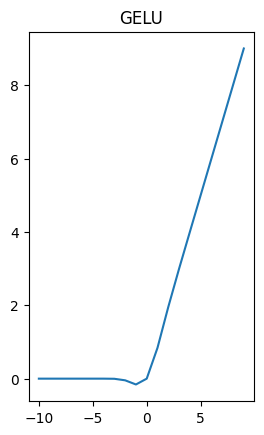

In [1]:
import torch
import math
import matplotlib.pyplot as plt


class GELU(torch.nn.Module):
    def forward(self,x):
        return 0.5*x*(1+torch.tanh(math.sqrt(2/math.pi)*(x+0.044715*torch.pow(x,3))))
    

def plot_function(f, name=''):
    plt.plot(range(-10,10), [f(torch.tensor(x, dtype=torch.float32)).item() for x in range(-10,10)]) #f is used to plot the function
    plt.title(name)
    

gelu=GELU()
    
# The plt.subplot(121) call is equivalent to plt.subplot(1, 2, 1). It specifies a grid of 1 row and 2 columns, and the subplot is placed in the first position (index 1) of the grid
plt.subplot(121)
plot_function(gelu, 'GELU')

# Testing

Here we creat a batch of 32 sequences, each of length 10, with 64 features

In [2]:
def test_forward():
    gelu=GELU()
    x=torch.randn(32,10,64)
    y=gelu(x)
    
    assert x.shape==y.shape

test_forward()